## Cargar DataFrame

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("Datos/dataset.csv",sep=";")

In [7]:
df.sample(5)

,Valor,Area,Dist_Playa,Dist_Farmacia
2224,166359,121,1.184168,0.832570
1147,116451,93,1.010073,0.885088
617,38817,55,9.205581,0.735525
2065,73937,63,0.028019,0.567365
3950,425139,144,0.308827,0.381591


## Se analiza desde describe() para visualizar outliers

In [8]:
df.describe().round(3)

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.000,5000.000,5000.000,5000.000
mean,259320.947,121.945,3.022,0.497
std,348108.851,90.537,3.171,0.291
min,13863.000,16.000,0.000,0.000
25%,85028.000,70.000,0.438,0.239
50%,151571.000,93.000,1.477,0.503
75%,293900.000,146.000,5.605,0.748
max,4621072.000,2000.000,17.963,1.000


In [9]:
df_arreglo = df
df_arreglo["Dist_Playa"] = df_arreglo["Dist_Playa"]+ 1 
df_arreglo["Dist_Farmacia"] = df_arreglo["Dist_Farmacia"]+ 1 
df_arreglo.describe()


,Valor,Area,Dist_Playa,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.593209e+05,121.944800,4.021920,1.497160
std,3.481089e+05,90.536969,3.170933,0.291355
min,1.386300e+04,16.000000,1.000000,1.000331
25%,8.502800e+04,70.000000,1.438417,1.238640
50%,1.515710e+05,93.000000,2.476958,1.503260
75%,2.939000e+05,146.000000,6.605379,1.747737
max,4.621072e+06,2000.000000,18.962942,1.999987


se puede observar que entre la media y el maximo entre valor y area hay mucha diferencia esto podria indicar que existen outliers

## Se genera la matriz de correlacion

In [10]:
df.corr().round(3)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.000,0.711,-0.367,-0.024
Area,0.711,1.000,-0.283,-0.031
Dist_Playa,-0.367,-0.283,1.000,0.026
Dist_Farmacia,-0.024,-0.031,0.026,1.000


se puede observar que la relacion entre la distancia_farmacia es muy pequeña, por lo que esto empieza a plantear que no es una variable descriptiva significativa para la regresion lineal

## Se realizara un boxplot y una distribucion de frecuencias para visualizar la desitribucion y su simetria o asimetria

In [11]:
import seaborn as sns

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Valor monetario'>

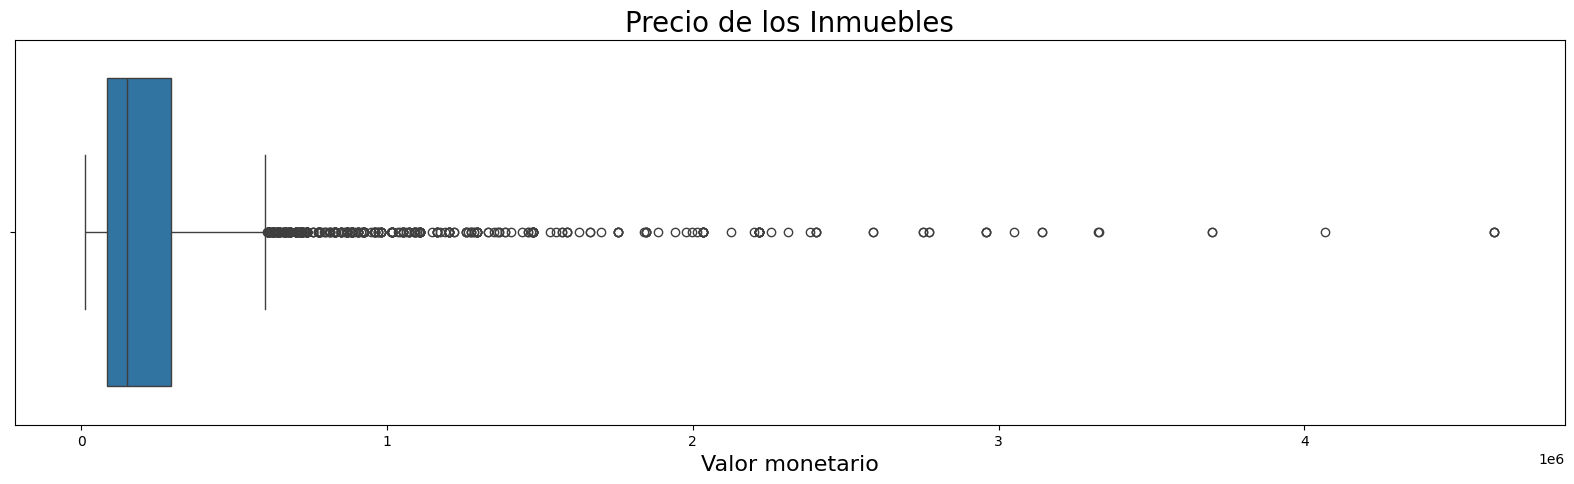

In [12]:
ax = sns.boxplot(data=df['Valor'],orient='h')
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
ax.set_xlabel('Valor monetario', fontsize=16)
ax

Desde aqui se puede analizar que correspondria a tener una gran cantidad de outliners que igualmente pueden corresponder a una distribucion asimetrica a la derecha

C:\Users\Pablo\AppData\Local\Temp\ipykernel_11104\618172945.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Valor'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='Valor monetario', ylabel='Density'>

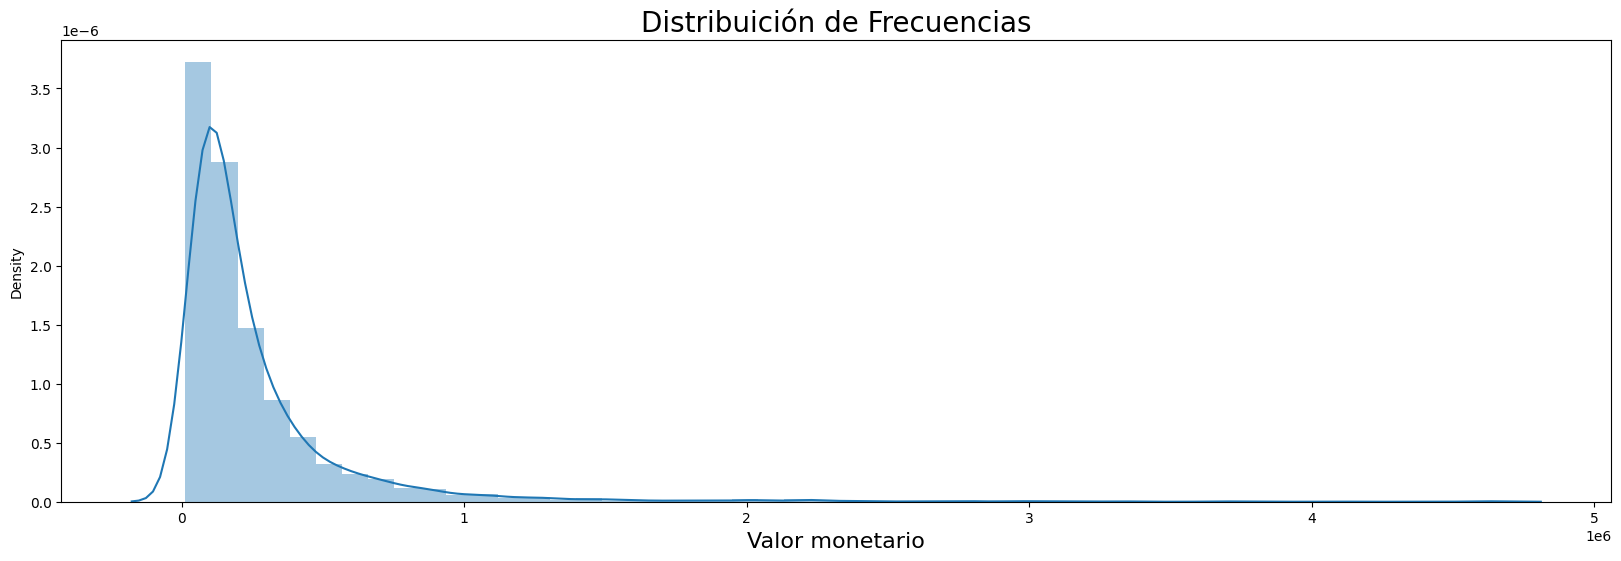

In [13]:
ax = sns.distplot(df['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Valor monetario', fontsize=16)
ax

una vez comprobada la asimetria es necesario aplicar algun metodo para transformarlo en una distribucion normal

## Para esto se utilizara la transformacion logaritmica

In [14]:
import numpy as np

Es necesario recordar que el logatirmo de 0 seria indefinido, por lo tanto, es necesario sumar uno a los elementos en que su minimo sea 0

In [15]:
df_log = pd.DataFrame()

In [16]:
df_log

""


In [17]:
df_log['Log_Valor'] = np.log(df['Valor'])
df_log['Log_Area'] = np.log(df['Area'])
df_log['Log_Dist_Playa'] = np.log(df['Dist_Playa']+1)
df_log['Log_Dist_Farmacia'] = np.log(df['Dist_Farmacia']+1)

In [18]:
df_log

,Log_Valor,Log_Area,Log_Dist_Playa,Log_Dist_Farmacia
0,13.653317,5.634790,0.806889,1.027344
1,12.021903,5.337538,1.066136,0.758230
2,13.063354,5.135798,0.722476,0.885138
3,11.529429,4.605170,1.585797,0.926266
4,12.915718,5.099866,0.806368,0.784985
...,...,...,...,...
4995,11.819380,4.248495,0.907999,1.012652
4996,12.021903,4.852030,2.360334,0.862962
4997,11.904116,4.248495,0.812324,0.884349
4998,10.466526,4.007333,2.392903,0.986176


## una vez realizada la transformacion se visualizaran los datos

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Valor monetario'>

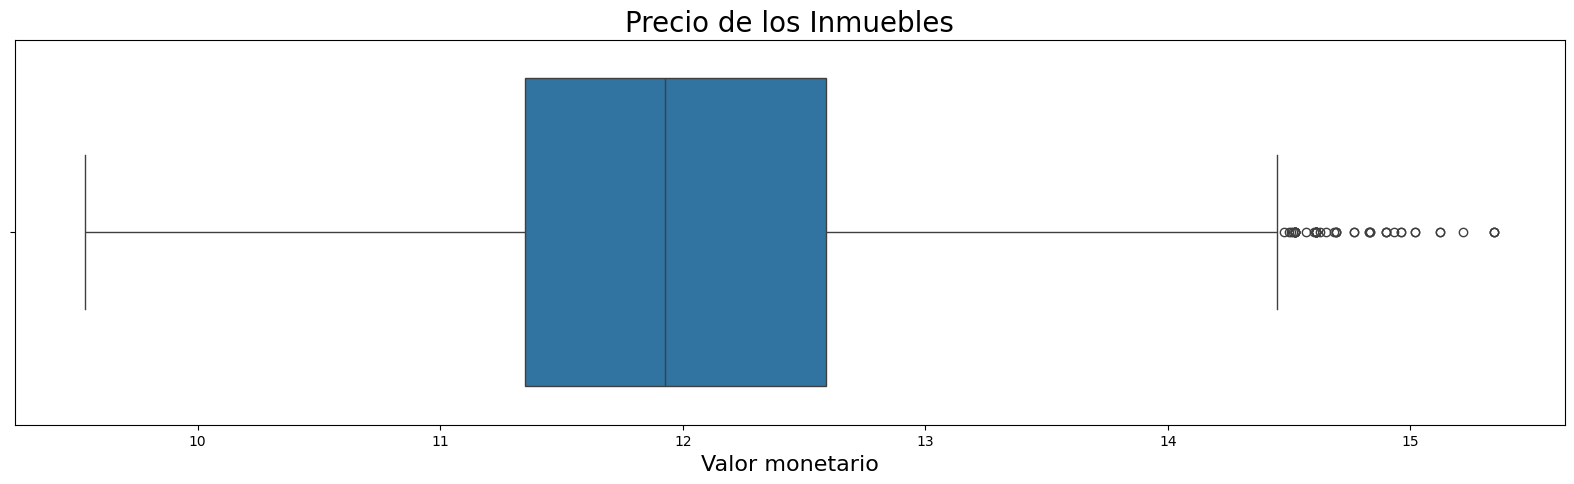

In [19]:
ax = sns.boxplot(data=df_log['Log_Valor'],orient='h')
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
ax.set_xlabel('Valor monetario', fontsize=16)
ax

C:\Users\Pablo\AppData\Local\Temp\ipykernel_11104\3367453217.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_log['Log_Valor'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='Valor monetario', ylabel='Density'>

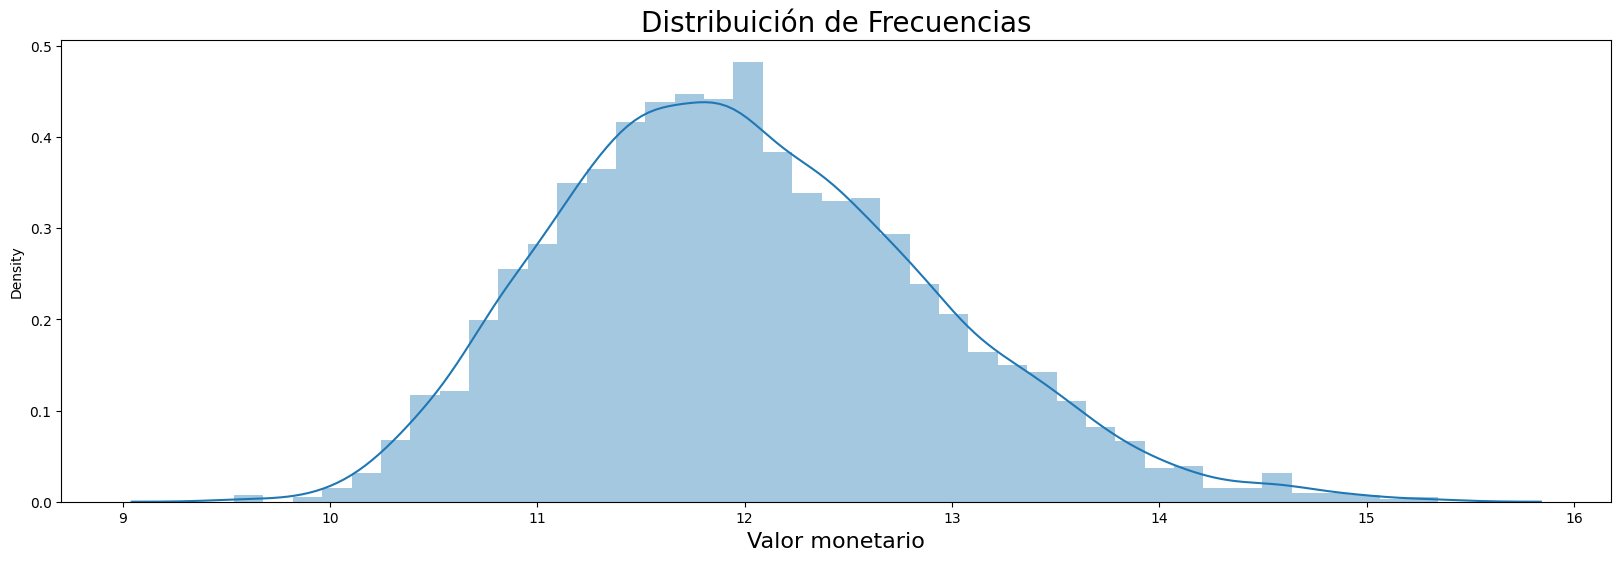

In [20]:
ax = sns.distplot(df_log['Log_Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Valor monetario', fontsize=16)
ax

Si bien no es una distribucion perfectamente simetrica es posible comprobar pruebas de hipotesis y comprobar si es posible aplicar para la regresion lineal

In [21]:
df_log.corr()

,Log_Valor,Log_Area,Log_Dist_Playa,Log_Dist_Farmacia
Log_Valor,1.000000,0.801234,-0.642352,-0.036345
Log_Area,0.801234,1.000000,-0.333221,-0.036794
Log_Dist_Playa,-0.642352,-0.333221,1.000000,0.026134
Log_Dist_Farmacia,-0.036345,-0.036794,0.026134,1.000000


## Se genera los graficos de dispersion para visualizar cada variable explicativa con la variable dependiente

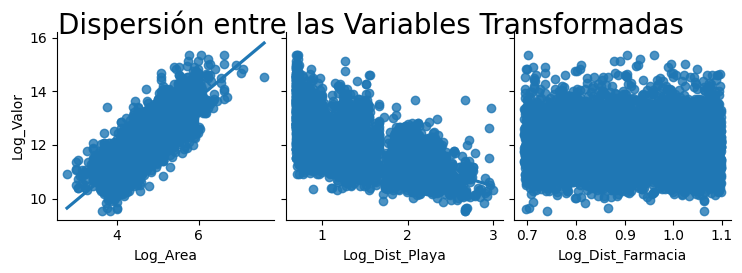

In [22]:
ax = sns.pairplot(df_log,y_vars='Log_Valor',x_vars=['Log_Area','Log_Dist_Playa','Log_Dist_Farmacia'],kind='reg')
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)

#	Valor	Area	Dist_Playa	Dist_Farmacia	Log_Dist_Playa	Log_Dist_Farmacia
ax 

Se puede observar que hay ciertas tendencias en Log_Area y Log_Dist_Playa, sin embargo, con farmacia no se observa una tendencia

## se realiza una la separacion entre datos de prueba y entrenamiento

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y = df_log['Log_Valor']

In [25]:
x = df_log[['Log_Area','Log_Dist_Playa','Log_Dist_Farmacia']]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811) #para facilitar se utiliza las variables de la documentacion

## Se realiza la estimacion del modelo de regresion lineal

In [27]:
import statsmodels.api as sm

Cuando se realiza una transformacion logaritmica no se contempla la constante de la formula por lo tanto hay que agregarla manualmente

In [28]:
X_train_Con_Constante = sm.add_constant(X_train)
X_train_Con_Constante

,const,Log_Area,Log_Dist_Playa,Log_Dist_Farmacia
2661,1.0,5.945421,0.693147,0.902440
912,1.0,3.135494,1.293497,1.040729
3042,1.0,4.317488,1.948655,0.965753
141,1.0,3.401197,0.860375,1.037235
3854,1.0,5.676754,0.709373,0.745396
...,...,...,...,...
3657,1.0,5.075174,2.147638,0.873797
979,1.0,4.174387,2.392039,0.774437
2389,1.0,4.394449,1.594623,0.918850
447,1.0,3.951244,2.275281,0.807733


In [29]:
modelo_statsmodels = sm.OLS(y_train,X_train_Con_Constante,hasconst=True).fit()

## se analiza las estadisticas con los siguientes test de hipotesis

test de significancia conjunta de parametros.
    prob (F-Statistic)<= 0.05 


Test de significacancia individual de los parametros.
    P>|t|<= 0.05

In [30]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Valor   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     5440.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:35:57   Log-Likelihood:                -2061.2
No. Observations:                4000   AIC:                             4130.
Df Residuals:                    3996   BIC:                             4156.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.0557      0.08

Para este caso se puede observar que P>|t| es superior a 0.05 por lo tanto se desestima para el modelo de regresion

## En este punto se realizara una prueba generando la transformacion logaritmica con una funcion en numpy

In [31]:
df_logConNumpy = df_arreglo.apply(np.log)

In [32]:
df_logConNumpy

,Valor,Area,Dist_Playa,Dist_Farmacia
0,13.653317,5.634790,0.215857,0.584245
1,12.021903,5.337538,0.644028,0.126187
2,13.063354,5.135798,0.057821,0.352991
3,11.529429,4.605170,1.356655,0.422036
4,12.915718,5.099866,0.214916,0.175946
...,...,...,...,...
4995,11.819380,4.248495,0.391608,0.561266
4996,12.021903,4.852030,2.261189,0.314935
4997,11.904116,4.248495,0.225651,0.351647
4998,10.466526,4.007333,2.297093,0.519367


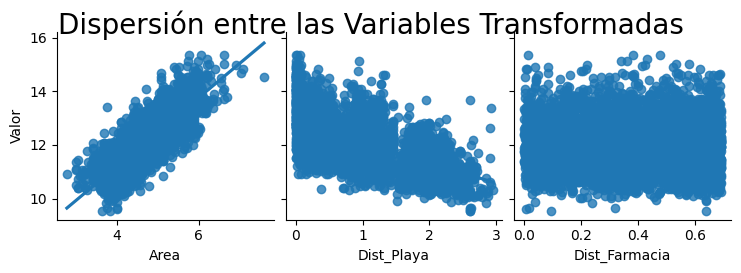

In [33]:
ax = sns.pairplot(df_logConNumpy,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],kind='reg')
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)

#	Valor	Area	Dist_Playa	Dist_Farmacia	Log_Dist_Playa	Log_Dist_Farmacia
ax 

In [34]:
y_nmpy = df_logConNumpy['Valor']

In [35]:
x_nmpy = df_logConNumpy[['Area','Dist_Playa','Dist_Farmacia']]


In [36]:
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(x_nmpy, y_nmpy, test_size=0.2, random_state=2811) 

In [37]:
X_train_Con_Constante_np = sm.add_constant(X_train_np)


X_train_Con_Constante_np

,const,Area,Dist_Playa,Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [38]:
modelo_statsmodels_np = sm.OLS(y_train_np,X_train_Con_Constante_np,hasconst=True).fit()

In [39]:
print(modelo_statsmodels_np.summary())

                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:35:58   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.6534      0.060    126.770

Se puede concluir que de ambos metodos se obtiene un poco mas de exactitud al realizarlo manualmente

## Se pudo concluir que la variable explicativa "Dist_Farmacia" no es significativa para el modelo de regresion lineal y se borrada

In [40]:
del df_log["Log_Dist_Farmacia"]

In [41]:
df_log

,Log_Valor,Log_Area,Log_Dist_Playa
0,13.653317,5.634790,0.806889
1,12.021903,5.337538,1.066136
2,13.063354,5.135798,0.722476
3,11.529429,4.605170,1.585797
4,12.915718,5.099866,0.806368
...,...,...,...
4995,11.819380,4.248495,0.907999
4996,12.021903,4.852030,2.360334
4997,11.904116,4.248495,0.812324
4998,10.466526,4.007333,2.392903


In [42]:
y = df_log['Log_Valor']

In [43]:
x = df_log[['Log_Area','Log_Dist_Playa']]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811) #para facilitar se utiliza las variables de la documentacion

In [45]:
X_train_Con_Constante = sm.add_constant(X_train)
X_train_Con_Constante

,const,Log_Area,Log_Dist_Playa
2661,1.0,5.945421,0.693147
912,1.0,3.135494,1.293497
3042,1.0,4.317488,1.948655
141,1.0,3.401197,0.860375
3854,1.0,5.676754,0.709373
...,...,...,...
3657,1.0,5.075174,2.147638
979,1.0,4.174387,2.392039
2389,1.0,4.394449,1.594623
447,1.0,3.951244,2.275281


In [46]:
modelo_statsmodels = sm.OLS(y_train,X_train_Con_Constante,hasconst=True).fit()

In [47]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Valor   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     8161.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:35:58   Log-Likelihood:                -2061.4
No. Observations:                4000   AIC:                             4129.
Df Residuals:                    3997   BIC:                             4148.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.0261      0.063    127.

## Se procede a entrenar modelo de regresion lineal con las variables explicativas que pasaran el test de hipotesis

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [49]:
modelo = LinearRegression() 

Se estima el modelo con fit()

In [50]:
modelo.fit(X_train,y_train)

LinearRegression()

se calcula R² del modelo desde sklear 

In [51]:
print("R² = {}".format(modelo.score(X_train,y_train).round(3)))

R² = 0.803


Se generan las predicciones en base a los datos de pruebas

In [52]:
y_predicho = modelo.predict(X_test)

gracias a esas predicciones se pueden especular el R² de los datos de prueba

In [53]:
print("R² = {}".format(metrics.r2_score(y_test,y_predicho).round(3)))

R² = 0.788


Ya que el R² de los datos de prueba es cercano al R² de los datos de entrenamientos, se puede deducir que se estan obteniendo predicciones adecuadas

## Se comparan datos reales con las predicciones obtenidas

In [54]:
entrada = X_test[0:1]
entrada

,Log_Area,Log_Dist_Playa
1006,5.273,1.527493


In [55]:
modelo.predict(entrada)[0]

12.633314444072479

Una vez obtenido el valor es necesario recordar que se realizo la transformacion logaritmica por lo que sera necesario volver al sistema normal

In [56]:
np.exp(modelo.predict(entrada)[0])

306604.65994230803

## Crear un simulador simple 

In [58]:
Area = 150
Dist_playa = 1

entrada = [[np.log(Area),np.log(Dist_playa)+1]]
print("US {}".format(np.exp(modelo.predict(entrada)[0]).round(2)))

US 326343.58


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
